# Primera parte: Introducción a las redes neuronales con Keras

En esta primera parte, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [ ]:
### Tu código aquí ###
print("En el set de entrenamiento hay " + str(x_train.shape[0])+ " muestras "+ "de tamaño "+  str(x_train.shape[1])+ "x"+ str(x_train.shape[2]) )
print("En el set de test hay " + str(x_test.shape[0])+ " muestras "+ "de tamaño "+  str(x_test.shape[1])+ "x"+ str(x_test.shape[2]) )


En el set de entrenamiento hay 60000 muestras de tamaño 28x28
En el set de test hay 10000 muestras de tamaño 28x28


*Tu respuesta aquí*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

Como podemos observar los ejemplos consisten en imágenes de 28x28 de 10 clases diferentes. La información en y consiste en una etiqueta de 0 al 9 que equivale a una prenda de ropa.

In [ ]:
print("Hay " + str(len(np.unique(y_train))) +   " clases distintas")

classes = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
          5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot' }
print(classes)  

Hay 10 clases distintas
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


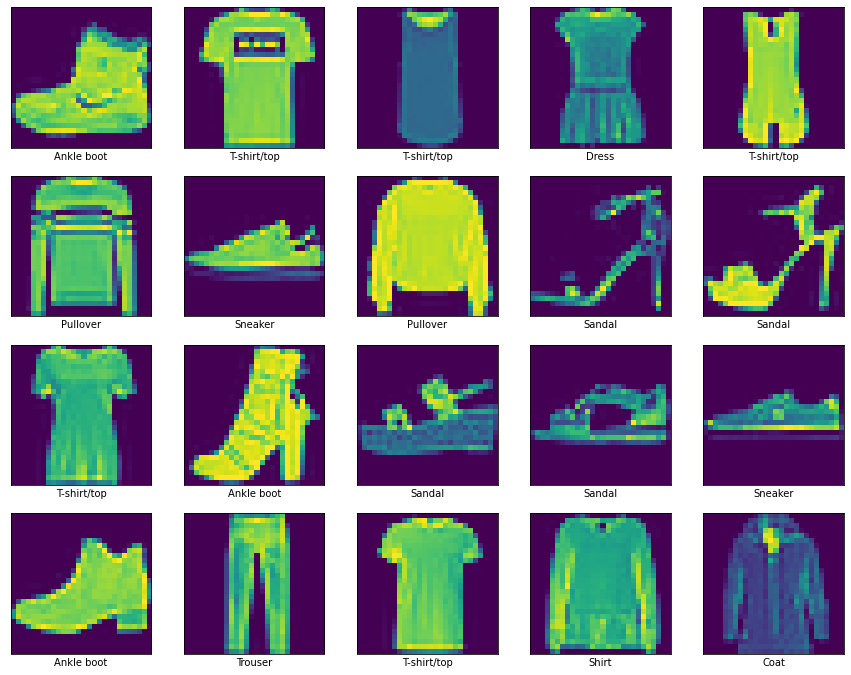

In [ ]:
### Tu código aquí ###
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i]])
plt.show()

Imprimimos un ejemplo del set de train para ver que la imagen es una matriz de 28x28 con valores comprendidos entre 0 y 1 ya que hemos normalizado

In [ ]:

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [ ]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

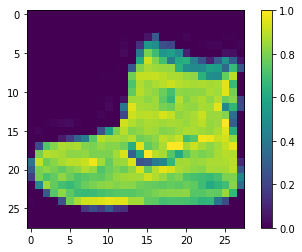

In [ ]:
visualize_example(x_train[0])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(3.5 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [ ]:
### Tu código aquí ###

# Definimos un modelo secuencial con una capa Flatten de entrada de 28x28 igual al tamaño de la imagen 
# Dos capas fully connected (capas densas) de 128 y 64 respectivamente con la función de activación sigmoid
# La última capa tiene 10 nodos uno por cada clase a clasificar

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(64, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

# La funcion de coste es sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 [==============================] - 3s 2ms/step - loss: 2.2878 - accuracy: 0.2512
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 2.0106 - accuracy: 0.5801
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 1.5822 - accuracy: 0.6059
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 1.2775 - accuracy: 0.6600
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 1.1020 - accuracy: 0.6907
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.9831 - accuracy: 0.7102
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.8970 - accuracy: 0.7214
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.8230 - accuracy: 0.7344
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.7809 - accuracy: 0.7395
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.7397 - accuracy: 0.7483

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(0.5 puntos)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [ ]:
### Tu código aquí ###
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

print('Accuracy: ', accuracy)

313/313 - 0s - loss: 0.5792 - accuracy: 0.7862
Accuracy:  0.7861999869346619


**Pregunta 3.2 *(0.5 puntos)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

El resultado que obtenemos es un vector el cual tenemos la probabilidad de cada clase. Utilizamos la función argmax para sacar el índice del mayor número del vector resultante. Podemos ver como la clase predicha coindice con la clase correcta

In [ ]:
### Tu código aquí ###
y_pred = model.predict(x_test)

In [ ]:
print(y_pred[0])

[7.5664240e-05 6.1322062e-05 7.5982265e-05 4.6431395e-04 7.1107708e-05
 1.3726902e-01 1.4160121e-04 2.5569451e-01 1.9377137e-02 5.8676934e-01]


Comprobamos que coindicen los indices

In [ ]:
print(np.argmax(y_pred[0]))

9


In [ ]:
print(y_test[0])

9


Vemos que la clase es correcta, coincide con la imagen,

In [ ]:
print(classes.get(y_test[0]))

Ankle boot


In [ ]:
print(classes.get(np.argmax(y_pred[0])))

Ankle boot


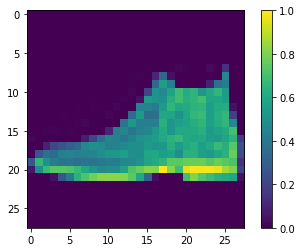

In [ ]:
visualize_example(x_test[0])